In [ ]:
# Practical 7: SVM using both linear and non-linear kernel function on Breast Cancer Dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [19]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)    
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVM Linear Kernel Accuracy: {accuracy_linear * 100:.2f}%")
print(f"SVM RBF Kernel Accuracy: {accuracy_rbf * 100:.2f}%")

SVM Linear Kernel Accuracy: 97.08%
SVM RBF Kernel Accuracy: 93.57%


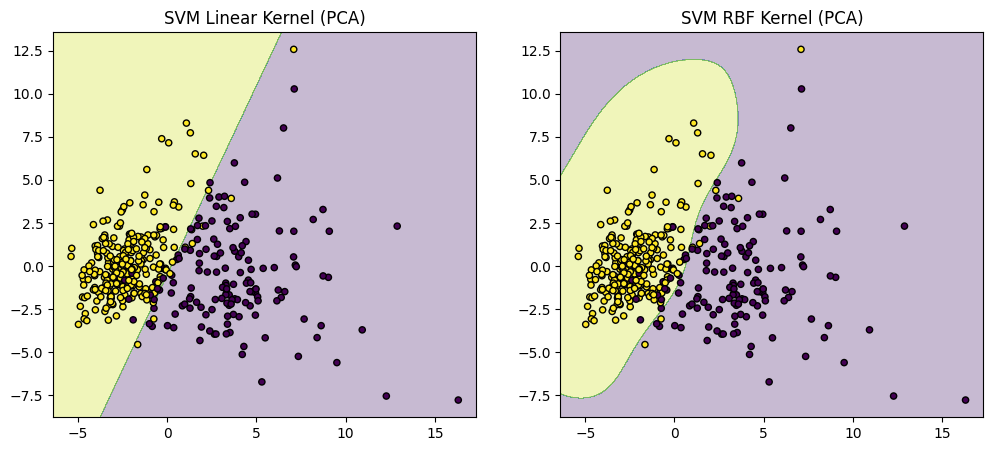

In [ ]:
def plot_decision_boundary(clf, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    ax.set_title(title)

# Visualize boundaries
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(svm_linear, X_train, y_train, axs[0], "SVM Linear Kernel (PCA)")
plot_decision_boundary(svm_rbf, X_train, y_train, axs[1], "SVM RBF Kernel (PCA)")
plt.show()